In [70]:
print("hello")

hello


In [71]:
import os

os.getcwd()

'/home/gio'

In [72]:
#Install the libraries
!pip install pandas
!pip install matplotlib
!pip install numpy==2.0.0 numba==0.60.0
!pip install shap
!pip install seaborn
!pip install scikit-learn

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [74]:
# Read the dataset
df = pd.read_csv("FinancialData.csv")
df

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,3/23/2021,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
1107,0,3/30/2021,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
1108,0,4/6/2021,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92
1109,0,4/13/2021,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,...,430.4087,1252.563,390.3848,4027.05,144.23,1197.06,1680.82,680.23,1672.46,108.40


In [75]:
#Checking the data
df.head()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,...,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,...,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,...,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,...,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,...,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [76]:
df.dtypes

Y              int64
Data          object
XAU BGNL     float64
ECSURPUS     float64
BDIY         float64
CRY          float64
DXY          float64
JPY          float64
GBP          float64
Cl1          float64
VIX          float64
USGG30YR     float64
GT10         float64
USGG2YR      float64
USGG3M       float64
US0001M      float64
GTDEM30Y     float64
GTDEM10Y     float64
GTDEM2Y      float64
EONIA        float64
GTITL30YR    float64
GTITL10YR    float64
GTITL2YR     float64
GTJPY30YR    float64
GTJPY10YR    float64
GTJPY2YR     float64
GTGBP30Y     float64
GTGBP20Y     float64
GTGBP2Y      float64
LUMSTRUU     float64
LMBITR       float64
LUACTRUU     float64
LF98TRUU     float64
LG30TRUU     float64
LP01TREU     float64
EMUSTRUU     float64
LF94TRUU     float64
MXUS         float64
MXEU         float64
MXJP         float64
MXBR         float64
MXRU         float64
MXIN         float64
MXCN         float64
dtype: object

All the data are mostly float, except the data column; we will change it to date dtype

In [77]:
# Checking the columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Y,1111.0,0.213321,0.409837,0.00000,0.00000,0.000,0.0000,1.0000
XAU BGNL,1111.0,987.463744,494.623740,256.68000,433.74000,1137.800,1324.8250,2006.9100
ECSURPUS,1111.0,0.036153,0.349453,-0.97400,-0.19100,0.035,0.2605,0.9910
BDIY,1111.0,2259.860486,2017.811888,291.00000,990.00000,1518.000,2685.5000,11793.0000
CRY,1111.0,245.247670,68.278066,106.29300,184.70555,234.560,301.5395,467.5700
DXY,1111.0,90.934982,11.379095,71.32900,81.24050,89.716,97.4040,119.8200
JPY,1111.0,106.605734,12.840754,75.94000,101.56500,108.720,116.2200,134.6300
GBP,1111.0,1.569661,0.212344,1.17200,1.41800,1.562,1.6775,2.0850
Cl1,1111.0,60.708101,25.900813,10.01000,39.62500,57.400,79.6400,140.9700
VIX,1111.0,19.992169,8.642157,9.43000,13.64000,17.980,23.6250,75.9100


In [78]:
# Checking duplicate
df[df["Data"].duplicated()]

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN


In [79]:
# Change data dtype to date
df["Data"] = pd.to_datetime(df["Data"])


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Y          1111 non-null   int64         
 1   Data       1111 non-null   datetime64[ns]
 2   XAU BGNL   1111 non-null   float64       
 3   ECSURPUS   1111 non-null   float64       
 4   BDIY       1111 non-null   float64       
 5   CRY        1111 non-null   float64       
 6   DXY        1111 non-null   float64       
 7   JPY        1111 non-null   float64       
 8   GBP        1111 non-null   float64       
 9   Cl1        1111 non-null   float64       
 10  VIX        1111 non-null   float64       
 11  USGG30YR   1111 non-null   float64       
 12  GT10       1111 non-null   float64       
 13  USGG2YR    1111 non-null   float64       
 14  USGG3M     1111 non-null   float64       
 15  US0001M    1111 non-null   float64       
 16  GTDEM30Y   1111 non-null   float64       


In [81]:
y = df["Y"]

In [82]:
df.set_index("Data", inplace=True)

In [83]:
df

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
Data,,,,,,,,,,,,,,,,,,,,,
2000-01-11,0,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,22.50,...,116.4640,230.527,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
2000-01-18,0,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,21.50,...,117.2670,231.377,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2000-01-25,0,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,23.02,...,117.9950,232.390,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
2000-02-01,0,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,23.45,...,120.5100,231.942,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
2000-02-08,1,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,21.25,...,118.7910,237.812,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-23,0,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,20.30,...,427.7972,1249.403,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83
2021-03-30,0,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,19.61,...,428.6578,1242.264,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80
2021-04-06,0,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,18.12,...,430.6649,1250.256,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92


In [84]:
#Check on the anomaly distribution
y.value_counts()

Y
0    874
1    237
Name: count, dtype: int64

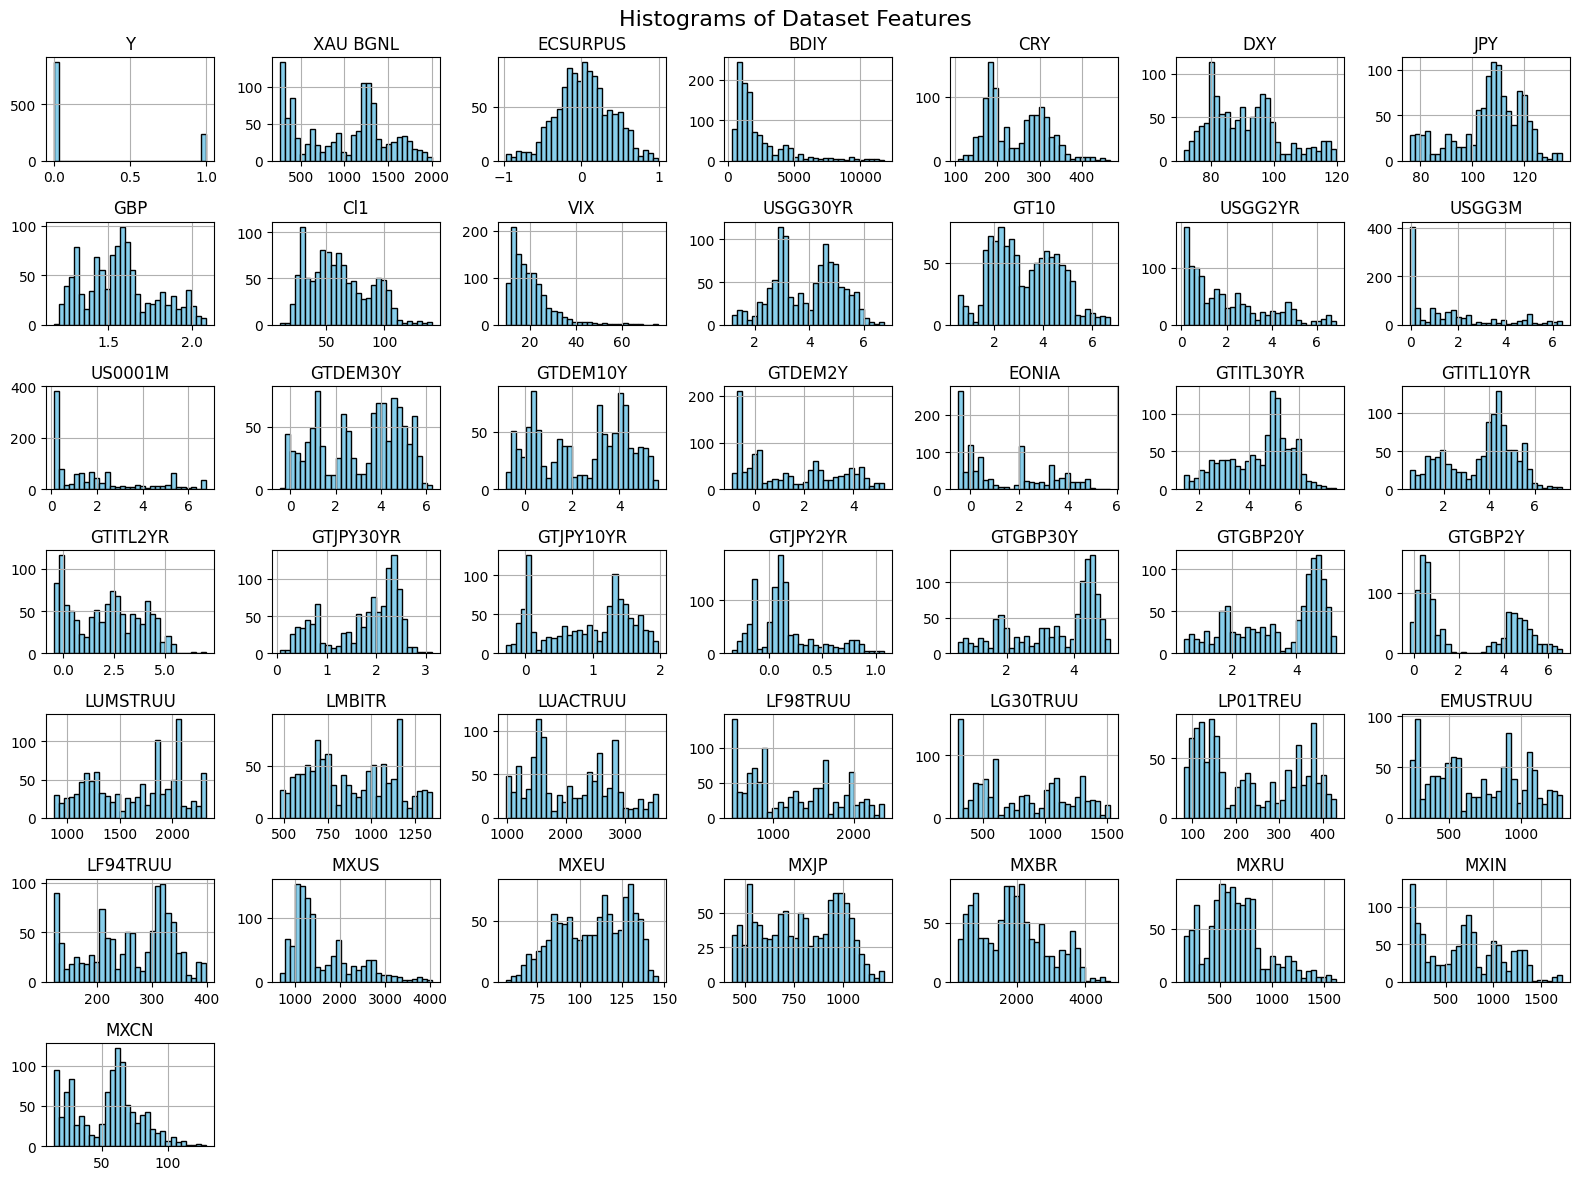

In [85]:
# Plot histograms for all columns
df.hist(figsize=(16, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Dataset Features", fontsize=16)
plt.tight_layout()
plt.show()

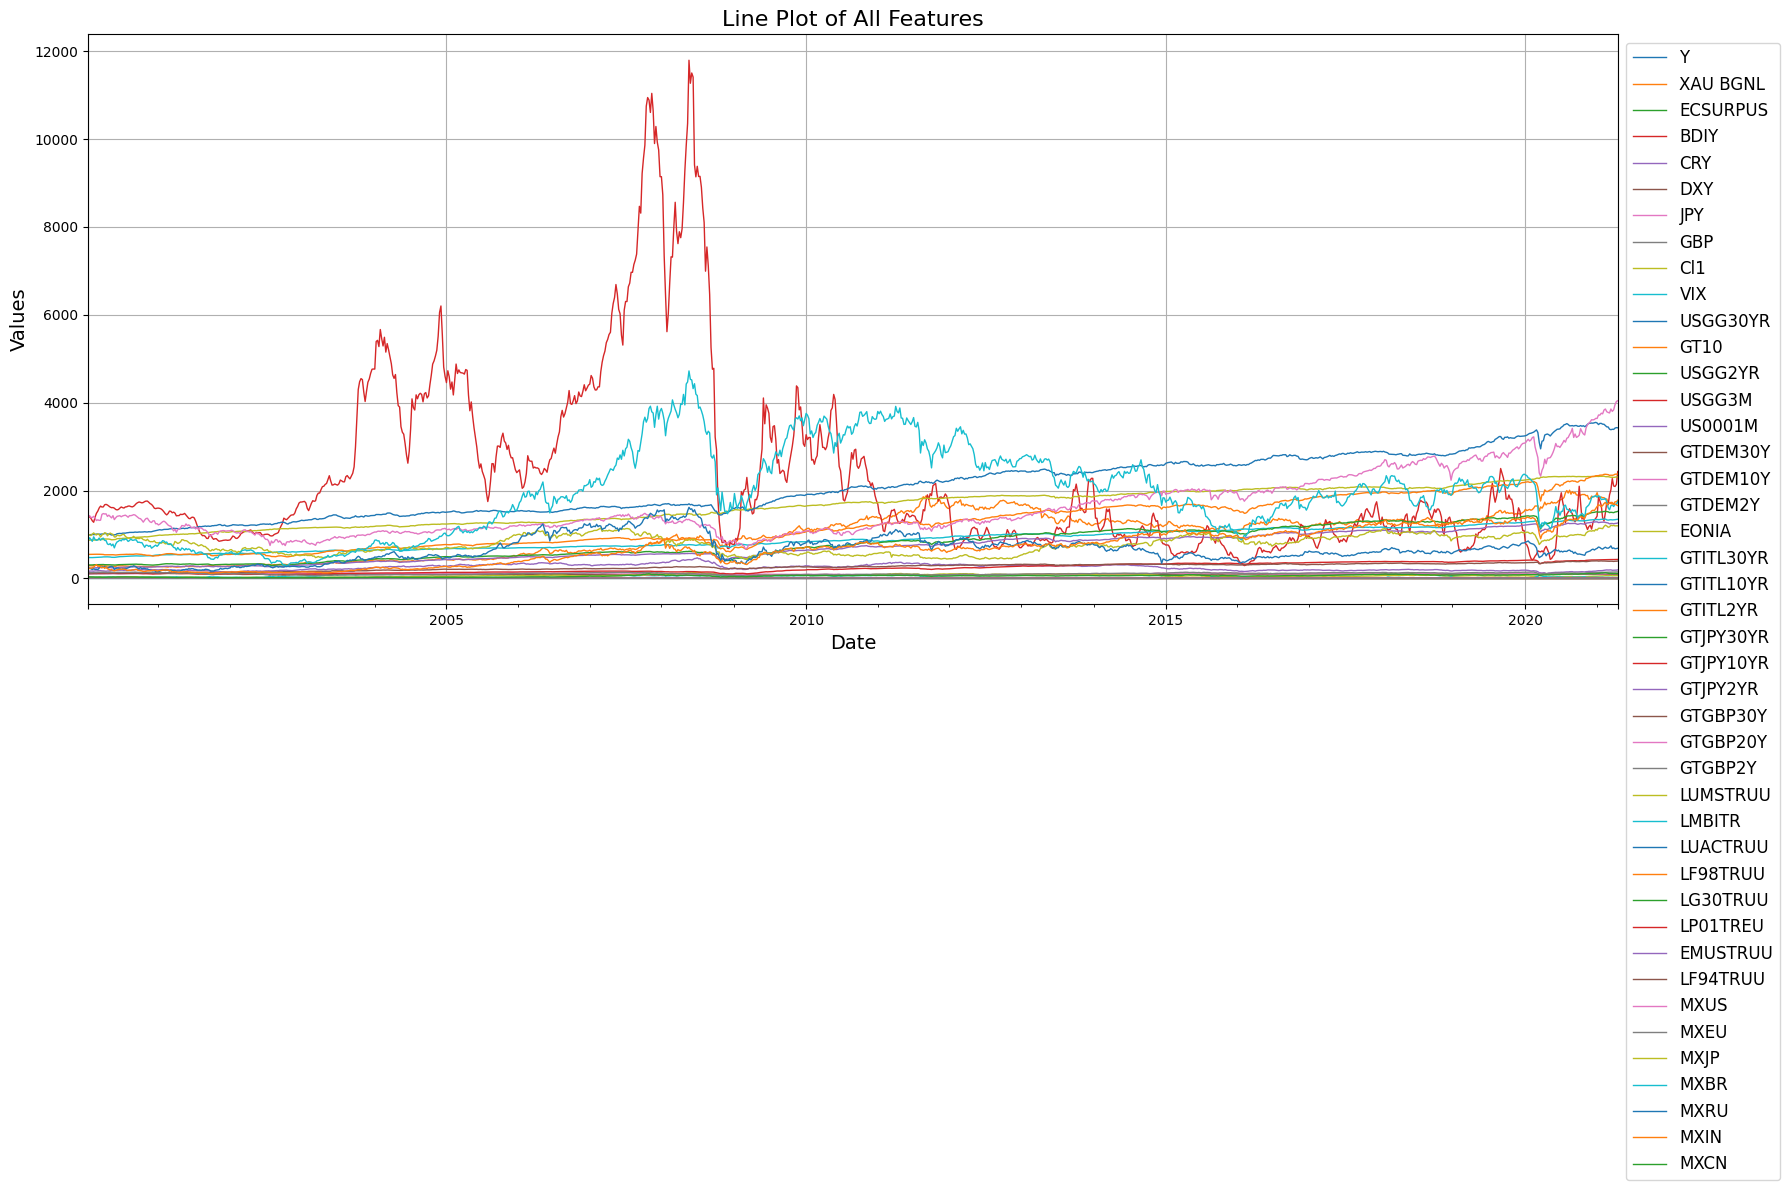

In [86]:
# Line plot for all columns
plt.figure(figsize=(18, 10))
df.plot(ax=plt.gca(), linewidth=1)
plt.title("Line Plot of All Features", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

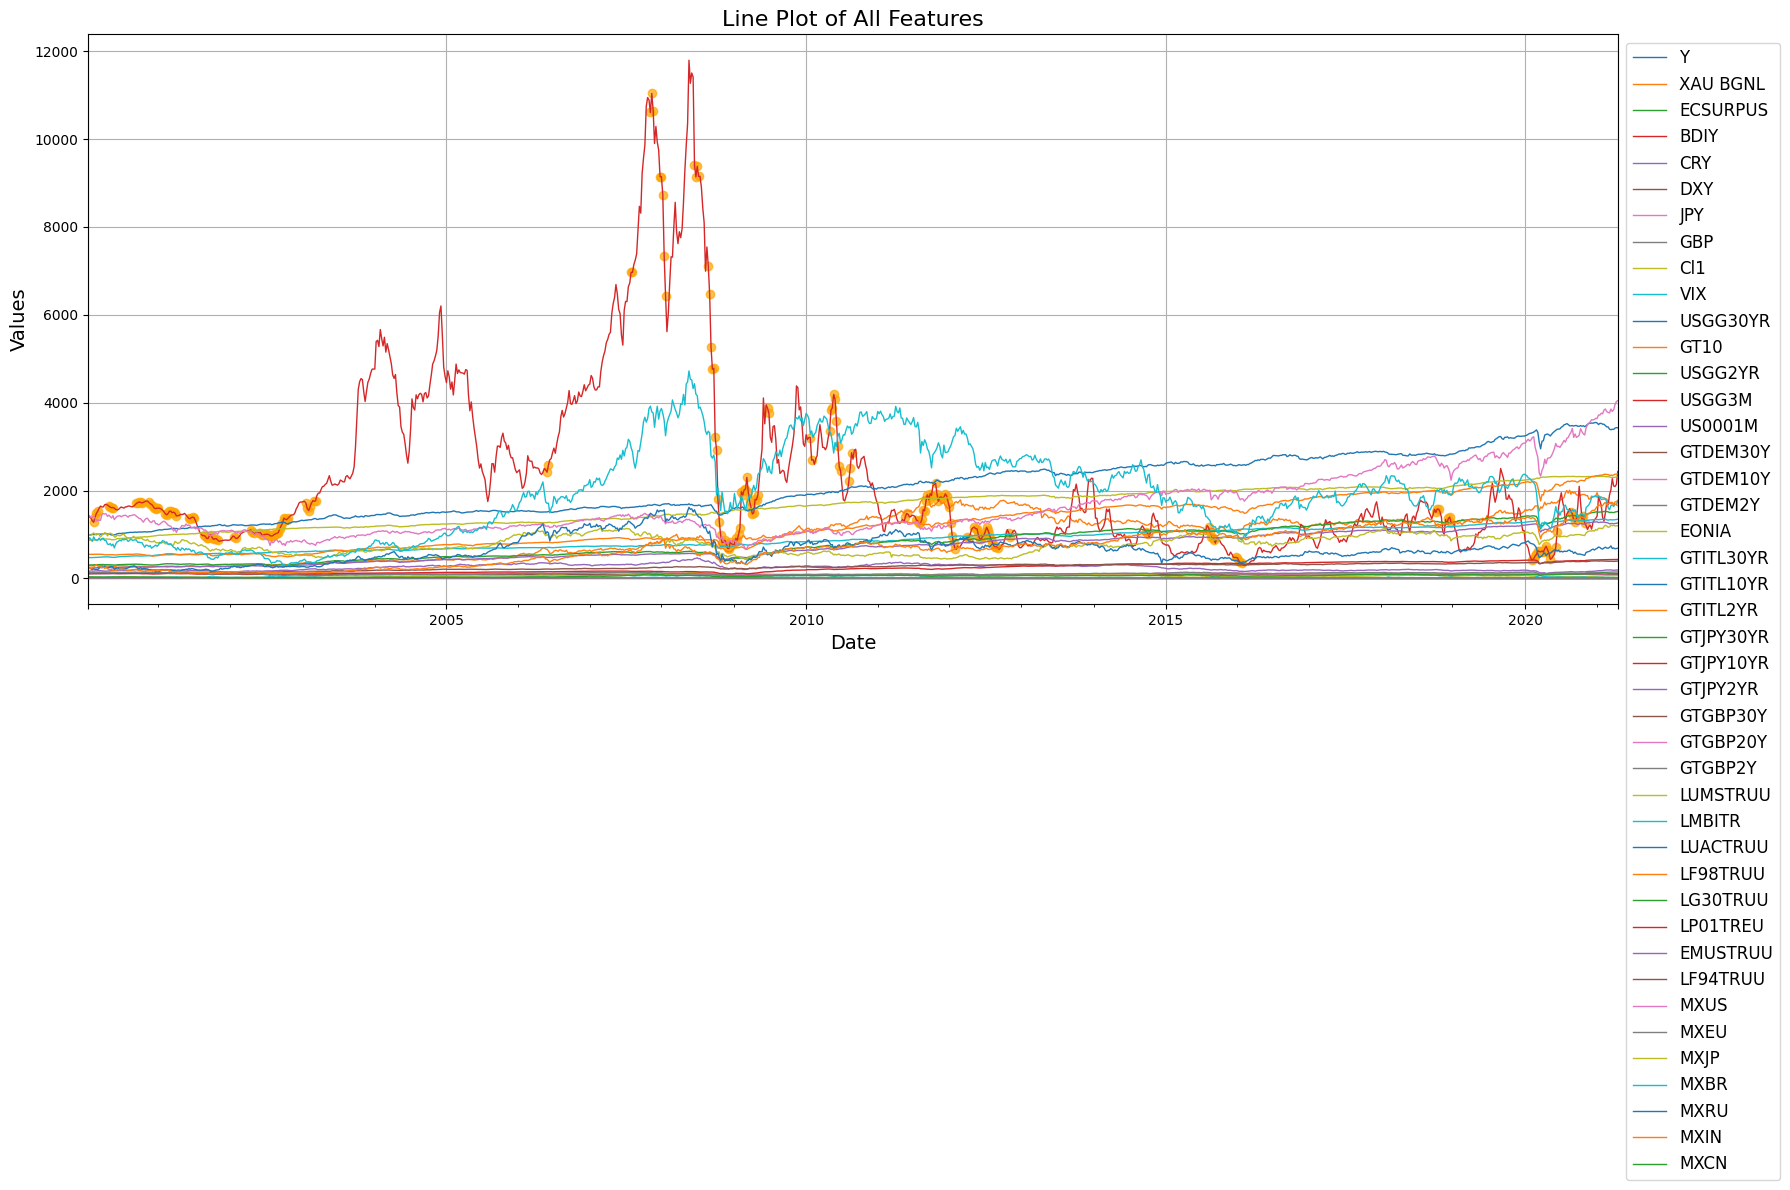

In [87]:
#Line plot and scatterplot to see the anomaly

# Filter the data where Y == 1
df_y1 = df[df['Y'] == 1]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(18, 10))

# Line plot for all columns
df.plot(ax=ax, linewidth=1)
ax.set_title("Line Plot of All Features", fontsize=16)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Values", fontsize=14)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Scatter plot for rows where Y == 1
ax.scatter(df_y1.index, df_y1['BDIY'], label='BDIY (Y==1)', alpha=0.7, c='orange')

# Display grid
ax.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

<Axes: >

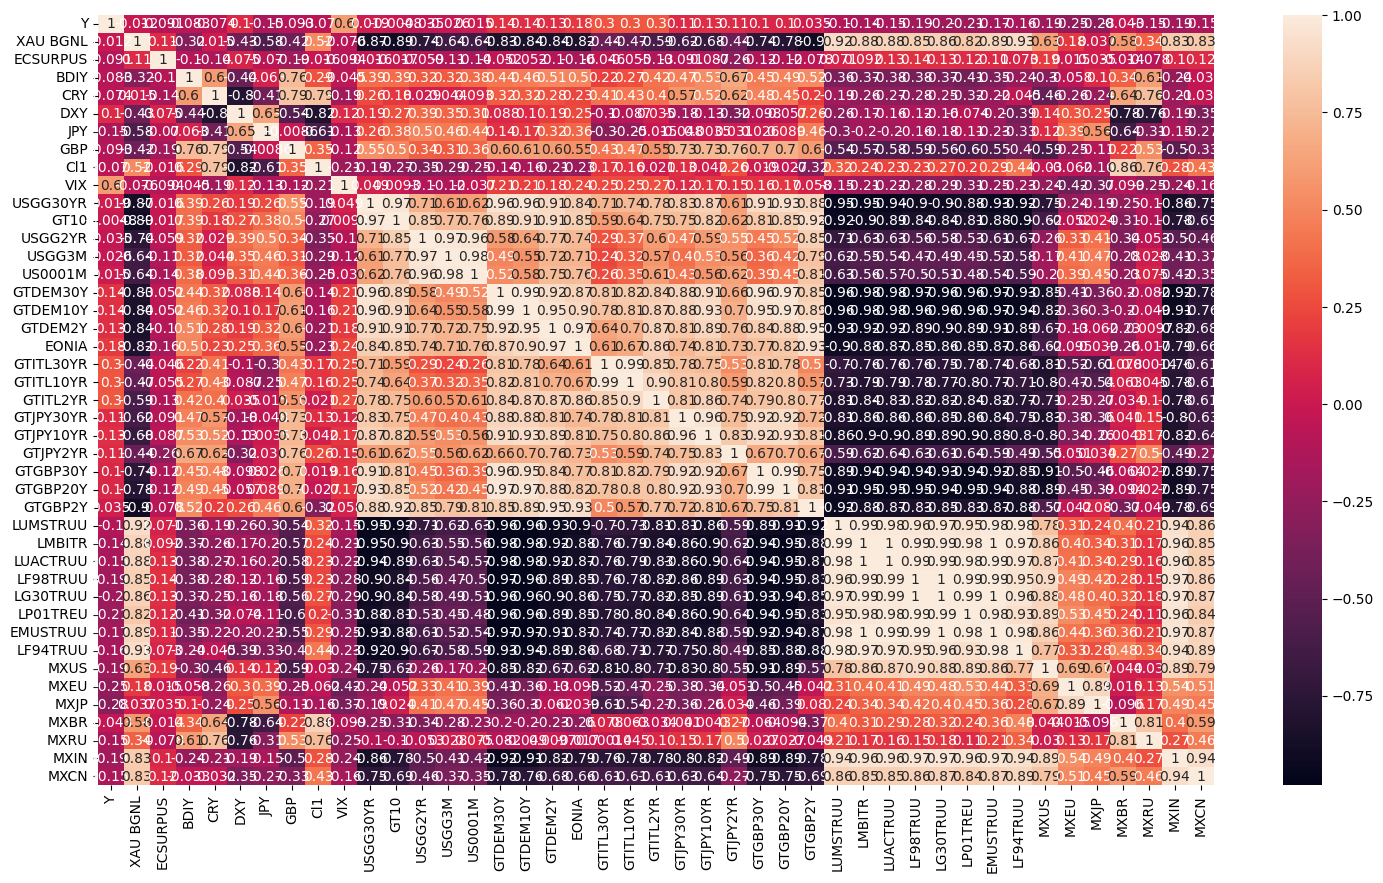

In [88]:
# Too many features too see the correlation clearly, but we can see that there are some correlation that are tightly connected to each other, and that is why we will do PCA 
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot= True)

In [89]:
#even tho, this is unsupervised machine learning, we also want to see the correlation between all these index and the anomaly, to gain more data
df.corr()["Y"].sort_values(ascending = True)

MXJP        -0.279399
MXEU        -0.253877
LP01TREU    -0.209774
LG30TRUU    -0.197232
MXUS        -0.193928
LF98TRUU    -0.189661
MXIN        -0.188942
EMUSTRUU    -0.169475
LF94TRUU    -0.156550
LUACTRUU    -0.153544
JPY         -0.151197
MXCN        -0.149581
MXRU        -0.148848
LMBITR      -0.143607
LUMSTRUU    -0.104897
GBP         -0.093201
ECSURPUS    -0.090772
BDIY        -0.083440
CRY         -0.074102
Cl1         -0.070141
MXBR        -0.043429
USGG2YR     -0.034909
USGG3M      -0.025935
XAU BGNL    -0.011535
GT10        -0.004776
US0001M      0.015379
USGG30YR     0.019255
GTGBP2Y      0.035010
GTGBP30Y     0.099777
GTGBP20Y     0.100142
DXY          0.103227
GTJPY2YR     0.112314
GTJPY30YR    0.114555
GTDEM2Y      0.130607
GTJPY10YR    0.133660
GTDEM10Y     0.139933
GTDEM30Y     0.141537
EONIA        0.180311
GTITL30YR    0.295000
GTITL10YR    0.297573
GTITL2YR     0.304528
VIX          0.598432
Y            1.000000
Name: Y, dtype: float64

#### Based on the data above, it looks like VIX (Votality Index) has the highest positive correlation on the market anomaly. Using this info, we will try to create more feature based on this feature

Info:
- VIX and Market Crashes
- When the market experiences a downturn or crisis (e.g., during the 2008 financial crisis or the COVID-19 market crash), the VIX tends to spike as investors anticipate high levels of volatility.
- Conversely, during periods of market stability or bullish trends, the VIX remains lower, reflecting investor confidence in continued growth.

### Feature Engineering

In [90]:
#Extract month
df['Month'] = df.index.month
df.head()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN,Month
Data,,,,,,,,,,,,,,,,,,,,,
2000-01-11,0,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,22.50,...,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30,1
2000-01-18,0,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,21.50,...,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74,1
2000-01-25,0,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,23.02,...,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46,1
2000-02-01,0,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,23.45,...,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29,2
2000-02-08,1,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,21.25,...,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32,2


In [91]:
# Extract week number from the datetime index
df['Week_Number'] = df.index.isocalendar().week

# Check the first few rows
df.head()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN,Month,Week_Number
Data,,,,,,,,,,,,,,,,,,,,,
2000-01-11,0,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,22.50,...,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30,1,2
2000-01-18,0,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,21.50,...,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74,1,3
2000-01-25,0,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,23.02,...,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46,1,4
2000-02-01,0,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,23.45,...,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29,2,5
2000-02-08,1,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,21.25,...,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32,2,6


In [92]:
df['Week_Number'].value_counts()

Week_Number
2     22
3     22
4     22
5     22
6     22
7     22
8     22
9     22
10    22
11    22
12    22
13    22
14    22
15    22
16    22
17    21
18    21
19    21
20    21
21    21
22    21
23    21
24    21
25    21
26    21
27    21
28    21
29    21
30    21
31    21
32    21
33    21
34    21
35    21
36    21
37    21
38    21
39    21
40    21
41    21
42    21
43    21
44    21
45    21
46    21
47    21
48    21
49    21
50    21
51    21
52    21
1     21
53     4
Name: count, dtype: Int64

In [93]:
# Shift the VIX column by 52 weeks (1 year) and create a new column for the shifted value
df['VIX_Diff_YoY'] = df['VIX'] - df['VIX'].shift(52)

# Impute missing values using interpolation, but it turns out that it doesnt work
# df['VIX_Diff_YoY'] = df['VIX_Diff_YoY'].interpolate(method='time')

# Impute using mean
df['VIX_Diff_YoY'] = df['VIX_Diff_YoY'].fillna(df['VIX_Diff_YoY'].mean())



In [94]:
# Calculate the percentage change between current VIX and shifted VIX (year-over-year change)
df['VIX_Pct_Change_YoY'] = (df['VIX'] - df['VIX'].shift(52)) / df['VIX'].shift(52) * 100

# Impute missing values in the percentage change column
df['VIX_Pct_Change_YoY'] = df['VIX_Pct_Change_YoY'].fillna(df['VIX_Pct_Change_YoY'].mean())


In [95]:
df.head(100)

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN,Month,Week_Number,VIX_Diff_YoY,VIX_Pct_Change_YoY
Data,,,,,,,,,,,,,,,,,,,,,
2000-01-11,0,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,22.50,...,127.75,990.59,856.76,224.33,217.34,34.30,1,2,0.103418,10.654446
2000-01-18,0,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,21.50,...,129.50,993.98,925.22,234.37,227.08,32.74,1,3,0.103418,10.654446
2000-01-25,0,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,23.02,...,126.48,974.83,886.93,216.82,233.00,32.46,1,4,0.103418,10.654446
2000-02-01,0,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,23.45,...,129.19,1007.12,842.60,201.89,237.48,31.29,2,5,0.103418,10.654446
2000-02-08,1,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,21.25,...,134.67,1034.58,945.15,218.00,258.02,31.32,2,6,0.103418,10.654446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-11-06,0,279.35,-0.174,845.0,147.17,115.12,121.14,1.457,19.92,28.80,...,102.70,654.95,521.89,197.79,130.96,15.66,11,45,3.890000,15.616218
2001-11-13,0,277.40,-0.136,851.0,154.96,116.53,121.53,1.442,21.67,26.47,...,105.32,622.19,539.80,230.64,131.37,15.77,11,46,-0.340000,-1.268184
2001-11-20,0,273.25,-0.174,857.0,149.84,116.62,122.60,1.421,19.15,24.12,...,105.94,652.77,529.91,211.29,137.80,16.69,11,47,-2.500000,-9.391435


<Axes: xlabel='Data'>

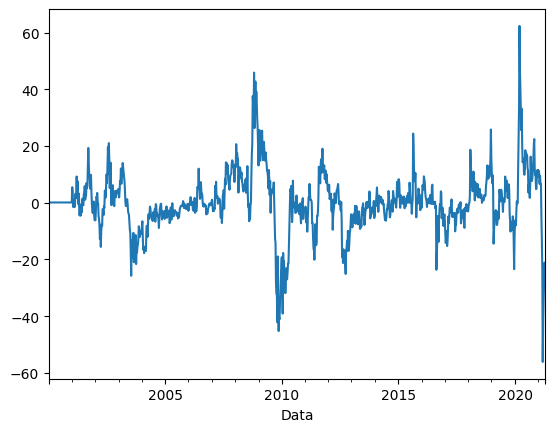

In [96]:
df["VIX_Diff_YoY"].plot()

In [97]:
# make another copy of df
df_copy = df.copy()

In [98]:
# this df without VIX shift
df_copy.drop(["VIX_Diff_YoY", "VIX_Pct_Change_YoY"], axis=1, inplace= True)
df_copy

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN,Month,Week_Number
Data,,,,,,,,,,,,,,,,,,,,,
2000-01-11,0,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,22.50,...,123.7620,1416.12,127.75,990.59,856.76,224.33,217.34,34.30,1,2
2000-01-18,0,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,21.50,...,123.7620,1428.79,129.50,993.98,925.22,234.37,227.08,32.74,1,3
2000-01-25,0,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,23.02,...,123.7620,1385.93,126.48,974.83,886.93,216.82,233.00,32.46,1,4
2000-02-01,0,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,23.45,...,122.3280,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29,2,5
2000-02-08,1,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,21.25,...,122.3280,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-23,0,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,20.30,...,389.8500,3800.77,140.32,1199.57,1671.73,681.21,1695.96,110.83,3,12
2021-03-30,0,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,19.61,...,385.8145,3835.96,142.76,1206.29,1635.57,693.38,1690.76,108.80,3,13
2021-04-06,0,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,18.12,...,390.6819,3955.16,144.13,1194.62,1689.62,673.20,1689.48,111.92,4,14


### Standarized Features

In [99]:
X = df.drop("Y", axis=1)
X

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN,Month,Week_Number,VIX_Diff_YoY,VIX_Pct_Change_YoY
Data,,,,,,,,,,,,,,,,,,,,,
2000-01-11,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,22.50,6.6710,...,127.75,990.59,856.76,224.33,217.34,34.30,1,2,0.103418,10.654446
2000-01-18,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,21.50,6.7470,...,129.50,993.98,925.22,234.37,227.08,32.74,1,3,0.103418,10.654446
2000-01-25,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,23.02,6.6340,...,126.48,974.83,886.93,216.82,233.00,32.46,1,4,0.103418,10.654446
2000-02-01,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,23.45,6.4230,...,129.19,1007.12,842.60,201.89,237.48,31.29,2,5,0.103418,10.654446
2000-02-08,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,21.25,6.2310,...,134.67,1034.58,945.15,218.00,258.02,31.32,2,6,0.103418,10.654446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-23,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,20.30,2.3264,...,140.32,1199.57,1671.73,681.21,1695.96,110.83,3,12,-41.370000,-67.082860
2021-03-30,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,19.61,2.3687,...,142.76,1206.29,1635.57,693.38,1690.76,108.80,3,13,-33.930000,-63.373179
2021-04-06,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,18.12,2.3230,...,144.13,1194.62,1689.62,673.20,1689.48,111.92,4,14,-28.580000,-61.199143


In [100]:
# This one is without the vix shift
X_copy = df_copy.drop("Y", axis=1)

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled =scaler.fit_transform(X)

In [102]:
X_copy_scaled =scaler.fit_transform(X_copy)

### PCA(Dimension Reduction)

In [103]:
from sklearn.decomposition import PCA

In [104]:
#apply PCA
pca = PCA()
pca.fit(X_scaled)

PCA()

In [105]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

In [106]:
explained_variance

array([5.46397189e-01, 1.42639596e-01, 1.00609367e-01, 5.87639281e-02,
       4.30848949e-02, 2.89254220e-02, 2.14268229e-02, 1.13452222e-02,
       8.88893293e-03, 7.64300145e-03, 6.04089326e-03, 4.63211963e-03,
       3.25409755e-03, 2.87711492e-03, 2.13633766e-03, 1.94748028e-03,
       1.74636314e-03, 1.03534836e-03, 9.87209474e-04, 9.18466334e-04,
       7.31356673e-04, 7.03421755e-04, 4.99933192e-04, 4.27529597e-04,
       3.63819487e-04, 3.29880998e-04, 2.76648993e-04, 2.44940356e-04,
       2.04377712e-04, 1.63143702e-04, 1.53476237e-04, 1.27666857e-04,
       9.75599990e-05, 8.68593536e-05, 7.83948502e-05, 5.20578911e-05,
       4.07899704e-05, 3.08444667e-05, 2.11653274e-05, 1.83407259e-05,
       1.41397911e-05, 1.14380870e-05, 8.62924378e-06, 6.42280691e-06,
       5.61362481e-06, 1.74113413e-06])

In [107]:
# Explained variance ratio but in cumulative sum, so it is easier
cumulative_variance = explained_variance.cumsum()
cumulative_variance

array([0.54639719, 0.68903679, 0.78964615, 0.84841008, 0.89149498,
       0.9204204 , 0.94184722, 0.95319244, 0.96208138, 0.96972438,
       0.97576527, 0.98039739, 0.98365149, 0.9865286 , 0.98866494,
       0.99061242, 0.99235878, 0.99339413, 0.99438134, 0.99529981,
       0.99603116, 0.99673459, 0.99723452, 0.99766205, 0.99802587,
       0.99835575, 0.9986324 , 0.99887734, 0.99908172, 0.99924486,
       0.99939834, 0.999526  , 0.99962356, 0.99971042, 0.99978882,
       0.99984087, 0.99988166, 0.99991251, 0.99993367, 0.99995202,
       0.99996616, 0.99997759, 0.99998622, 0.99999265, 0.99999826,
       1.        ])

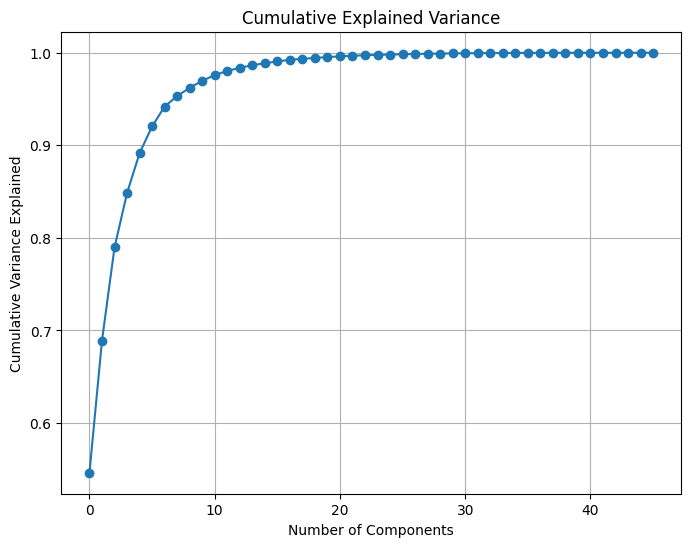

In [108]:
# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()

From the data above, we see that to retain 95% of variance, we only need around 8 components

In [109]:
# Retain 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [110]:
X_pca.shape

(1111, 8)

In [111]:
pca.explained_variance_ratio_

array([0.54639719, 0.1426396 , 0.10060937, 0.05876393, 0.04308489,
       0.02892542, 0.02142682, 0.01134522])

In [112]:
#access pca components
components = pca.components_
components

array([[ 1.72661736e-01,  2.41672445e-02, -8.83028798e-02,
        -6.52508749e-02, -2.41944027e-02, -4.01460376e-02,
        -1.25612737e-01,  3.66743382e-02, -3.87538703e-02,
        -1.89239046e-01, -1.81582578e-01, -1.34384708e-01,
        -1.18657101e-01, -1.23445335e-01, -1.95699623e-01,
        -1.97024175e-01, -1.89475496e-01, -1.81145963e-01,
        -1.53534801e-01, -1.60920680e-01, -1.74442502e-01,
        -1.76334744e-01, -1.85143609e-01, -1.39594851e-01,
        -1.87355638e-01, -1.91305315e-01, -1.80455591e-01,
         1.95497063e-01,  1.97552981e-01,  1.97618123e-01,
         1.95149517e-01,  1.95179649e-01,  1.94000531e-01,
         1.96119334e-01,  1.89608276e-01,  1.68131966e-01,
         7.13603187e-02,  5.77472245e-02,  4.99730866e-02,
         1.44473916e-02,  1.87110189e-01,  1.62817097e-01,
         1.82925697e-03,  1.53690807e-03,  3.50604535e-03,
         1.56513162e-02],
       [-1.58325368e-01,  2.56745182e-02, -1.55060607e-01,
        -3.26159286e-01,  3.60

In [113]:
loading_df = pd.DataFrame(components, columns=X.columns, index=[f'PC{i+1}' for i in range(components.shape[0])])
loading_df

,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,...,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN,Month,Week_Number,VIX_Diff_YoY,VIX_Pct_Change_YoY
PC1,0.172662,0.024167,-0.088303,-0.065251,-0.024194,-0.040146,-0.125613,0.036674,-0.038754,-0.189239,...,0.071360,0.057747,0.049973,0.014447,0.187110,0.162817,0.001829,0.001537,0.003506,0.015651
PC2,-0.158325,0.025675,-0.155061,-0.326159,0.360435,0.290236,-0.196097,-0.342133,0.008633,0.028772,...,0.161854,0.180221,-0.326479,-0.282414,-0.019284,-0.093896,-0.014271,-0.014115,0.047054,0.029264
PC3,-0.011428,-0.038083,0.242791,0.141223,-0.071891,0.141784,0.163572,0.112184,-0.194651,0.024986,...,0.344355,0.375593,0.135685,0.284969,0.133875,0.178264,-0.017661,-0.014424,0.005696,0.028306
PC4,0.052973,-0.146246,0.059618,-0.043275,-0.002785,-0.016411,-0.027716,-0.027775,0.483939,-0.101393,...,-0.045498,-0.001726,0.027510,0.029076,0.020316,0.070795,0.066544,0.068629,0.556116,0.574314
PC5,-0.029948,-0.080655,0.060658,-0.001493,-0.000511,0.028938,0.023673,-0.012904,-0.054646,-0.012090,...,-0.014252,-0.001619,-0.041040,-0.017675,-0.002377,-0.025161,0.695665,0.695180,-0.069539,-0.071974
PC6,-0.185475,-0.331366,0.278365,0.096903,-0.160179,0.332490,0.318996,-0.123990,-0.063660,-0.056570,...,-0.191224,0.023310,-0.166518,0.053659,-0.048599,-0.106296,-0.072689,-0.077018,0.049935,0.031126
PC7,-0.038466,0.853563,0.269247,-0.039470,-0.051582,0.081265,0.067558,-0.055475,0.100855,0.063816,...,-0.109148,0.056854,-0.005980,0.047577,0.029029,0.102440,0.043228,0.045939,0.017721,0.135808
PC8,-0.026287,0.234327,-0.291708,0.295363,-0.146325,-0.036485,0.220140,0.162210,-0.346395,-0.070891,...,-0.095971,-0.015263,-0.277502,-0.037730,-0.150391,-0.318604,0.014578,0.020085,0.368925,0.138557


Turns out, if i use PCA, SHAP wont be able to interpret the data, and can only explain the PCA components and not the original feature that can make the anomaly. So, we will try using VIF

### Isolation Forest

In [114]:
from sklearn.ensemble import IsolationForest


In [137]:
#we expect contamination around 20%
iso_forest = IsolationForest(contamination=0.2, random_state=42)
y_pred = iso_forest.fit_predict(X_scaled)


In [138]:
#Try using isolation forest for df without VIX shift
iso_forest_copy = IsolationForest(contamination=0.2, random_state=42)
y_copy_pred = iso_forest_copy.fit_predict(X_copy_scaled)

In [118]:
y_pred

array([-1, -1, -1, ..., -1, -1, -1])

In [119]:
y_copy_pred

array([-1, -1, -1, ..., -1, -1, -1])

In [122]:
df["y_pred"] = y_pred

In [124]:
df_copy["y_copy_pred"] = y_copy_pred

In [125]:
df["y_pred"].value_counts()

y_pred
 1    889
-1    222
Name: count, dtype: int64

In [126]:
df_copy["y_copy_pred"].value_counts()

y_copy_pred
 1    889
-1    222
Name: count, dtype: int64

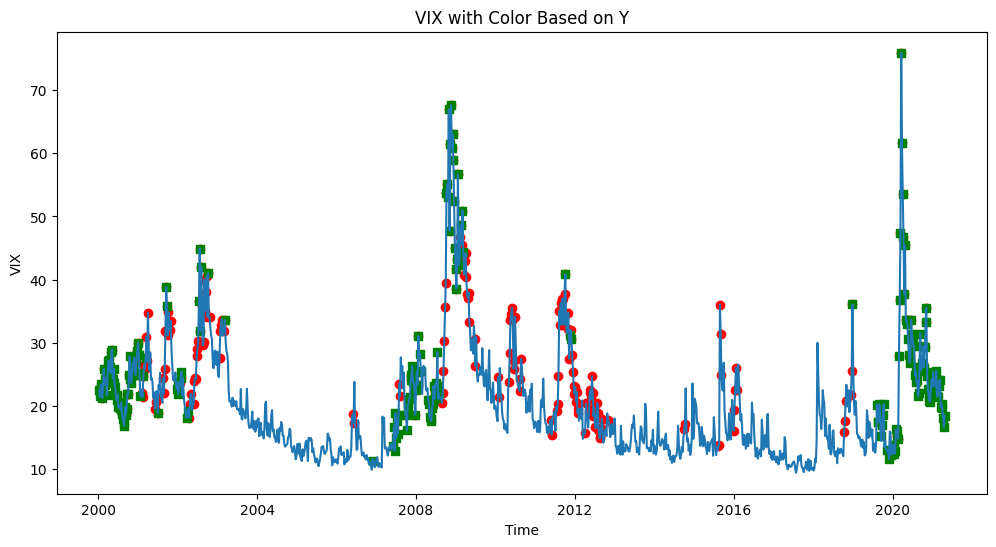

In [127]:
#Figure: Plot VIX with color based on Y and y_pred
df_y1 = df[df['Y'] == 1]
df_ypred1  = df[df['y_pred'] == -1]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["VIX"])

# Scatter for actual data (df_y1)
plt.scatter(df_y1.index, df_y1["VIX"], c='red', marker='o', label='Actual Data (Y)')
 
# Scatter for predicted data (df_ypred1)
plt.scatter(df_ypred1.index, df_ypred1["VIX"], c='green', marker='s', label='Predicted Data (y_pred)')


plt.title("VIX with Color Based on Y")
plt.xlabel("Time")
plt.ylabel("VIX")
plt.show()

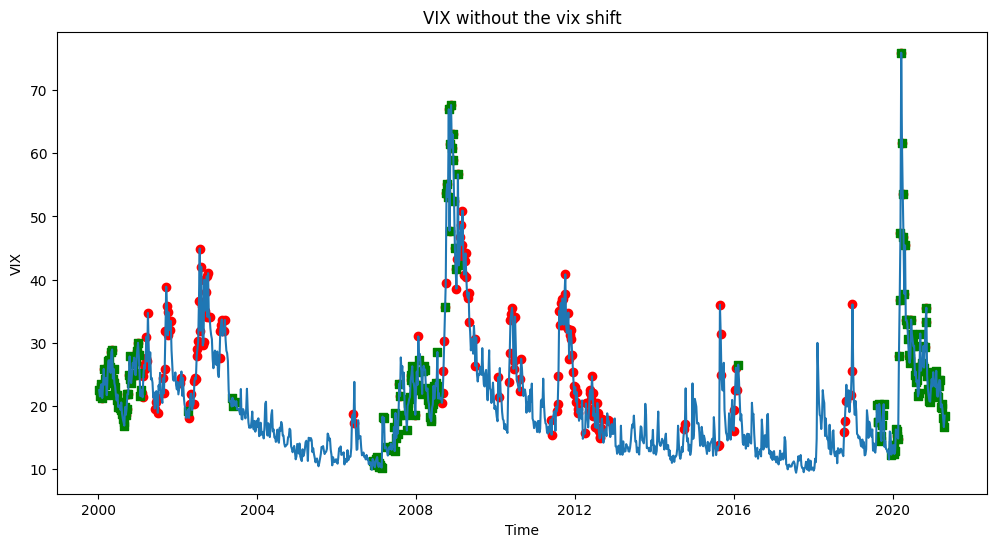

In [128]:
#Figure: Plot VIX without VIX shift
df_y1 = df[df['Y'] == 1]
df_copy_ypred1  = df_copy[df_copy['y_copy_pred'] == -1]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["VIX"])

# Scatter for actual data (df_y1)
plt.scatter(df_y1.index, df_y1["VIX"], c='red', marker='o', label='Actual Data (Y)')
 
# Scatter for predicted data (df_ypred1)
plt.scatter(df_copy_ypred1.index, df_copy_ypred1["VIX"], c='green', marker='s', label='Predicted Data (y_pred)')


plt.title("VIX without the vix shift")
plt.xlabel("Time")
plt.ylabel("VIX")
plt.show()

Based on the color above, it looks like the isolation forest could not predict the anomalies that well

And the model with 

In [129]:
df.head()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,MXJP,MXBR,MXRU,MXIN,MXCN,Month,Week_Number,VIX_Diff_YoY,VIX_Pct_Change_YoY,y_pred
Data,,,,,,,,,,,,,,,,,,,,,
2000-01-11,0,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,22.50,...,990.59,856.76,224.33,217.34,34.30,1,2,0.103418,10.654446,-1
2000-01-18,0,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,21.50,...,993.98,925.22,234.37,227.08,32.74,1,3,0.103418,10.654446,-1
2000-01-25,0,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,23.02,...,974.83,886.93,216.82,233.00,32.46,1,4,0.103418,10.654446,-1
2000-02-01,0,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,23.45,...,1007.12,842.60,201.89,237.48,31.29,2,5,0.103418,10.654446,-1
2000-02-08,1,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,21.25,...,1034.58,945.15,218.00,258.02,31.32,2,6,0.103418,10.654446,-1


In [131]:
# Create classification report 
from sklearn.metrics import classification_report
df["y_pred"] = np.where(df["y_pred"]== -1, 1,0)

In [132]:
report = classification_report(df["Y"], df["y_pred"], target_names=["Normal", "Anomaly"])
print(report)

              precision    recall  f1-score   support

      Normal       0.84      0.85      0.84       874
     Anomaly       0.41      0.38      0.40       237

    accuracy                           0.75      1111
   macro avg       0.62      0.62      0.62      1111
weighted avg       0.74      0.75      0.75      1111



### Create SHAP here

In [133]:
!pip install shap

In [134]:
import shap

In [163]:
#shap KernelExplainer better for model like SVM, isolation, and KNN
y_pred.mean()


np.float64(0.6003600360036003)

In [167]:
# Use TreeExplainer for tree-based models like Isolation Forest
explainer = shap.TreeExplainer(iso_forest)


In [171]:
explainer.expected_value

array([11.15009791])

In [165]:
shap_values = explainer.shap_values(X_scaled)


In [166]:
explainer.expected_value

array([11.15009791])

In [153]:
shap_values[0].shape

(46,)

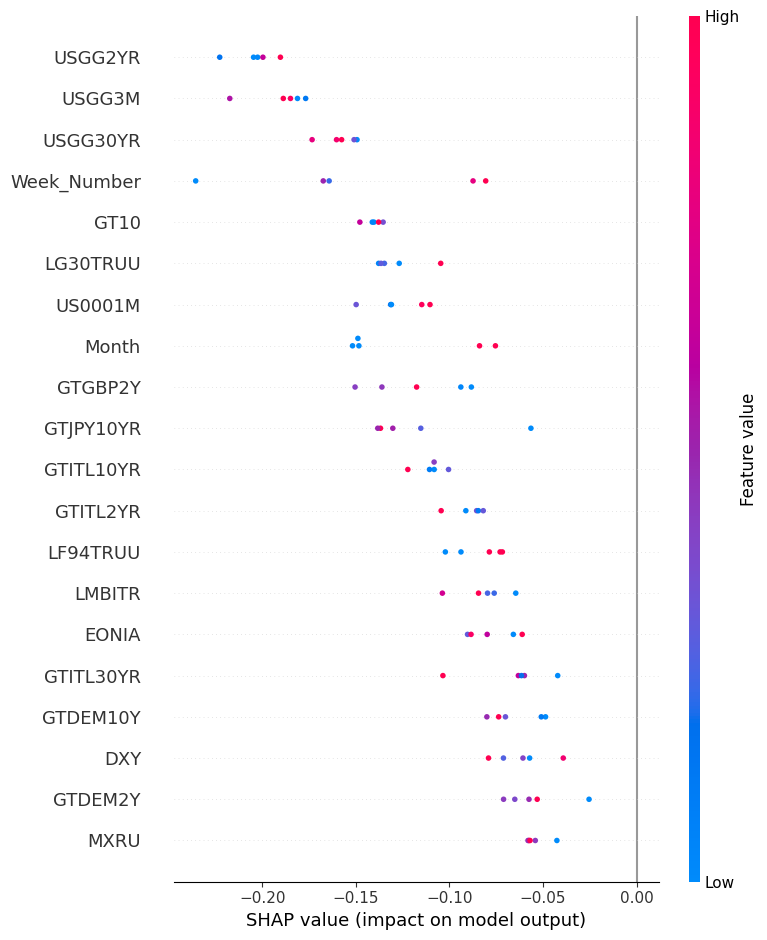

In [155]:
shap.summary_plot(shap_values[:5], X_scaled[:5], feature_names=X.columns)

In [150]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_scaled[0])

In [161]:
explainer.expected_value

array([11.15009791])

In [148]:
shap_values_for_instance = shap_values[0]  # For the first instance in X_scaled
print(sum(shap_values_for_instance))

-2.580535893043869


In [149]:
iso_forest.predict_proba(X_scaled[0])

AttributeError: 'IsolationForest' object has no attribute 'predict_proba'

In [ ]:
shap.summary_plot(shap_values, X_scaled, feature_names= df.c)

In [ ]:
shap.initjs()


# Conclusion

#### Recall score with isolation forest around 40%, it means the model is not good at predicting anomalies
- Try splitting the data so we can try to use hyperparameter tuning for isolation forest so we can have better recall score. Split the data manually instead of train_test_split


#### Need to do
- Redo SHAP
- Add more models like DBScan and onesvm
- Create UI
- Explore more feature engineering
- Do feature reduction

# Lesson Learned
- Try using PCA to reduce multicolinearity, but it makes hard to explain how each feature contribute to the prediction

### Create confusion matrix over here

## Other steps

Project Requirements:

Milestone 1: Develop an anomaly detection model using either this provided dataset or your own to classify market crashes. This is a binary output: crash or no crash. Perform statistical research to select and implement the most effective machine learning model for the task, such as logistic regression, neural networks, etc.


Milestone 2: Enhance the system by proposing a data-driven investment strategy based on the model’s predictions, focusing on minimizing losses or maximizing returns.


Milestone 3: Design and integrate an AI-driven bot to explain the investment strategy to end users, making it accessible and actionable.


Others:

- Use more model to create it, DBSCAN, neural networks
- Create UI for it, that predict crash or no crash
- 

## Priorities:
- Make SHAP first to explain isolation forest
- Plan to create the UI using streamlit
- Plan to use PHIDATA or CrewAI for agent

In [ ]:
df.columns